In [1]:
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url
import clustbench
from sklearn import cluster
import numpy as np
import os

In [2]:
battery = "wut"
dataset = "x2"
reference_methods_group = "sklearn_kmeans"
methods = ["KMeans", "sklearn_kmeans"]

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([2, 3, 1])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC clusterization

In [5]:
%%time
m = cluster.KMeans()
results["KMeans"] = clustbench.fit_predict_many(m, benchmark.data, benchmark.n_clusters)
results.keys()

CPU times: total: 109 ms
Wall time: 166 ms


c:\Users\mmakaranka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mmakaranka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


dict_keys(['sklearn_kmeans', 'KMeans'])

## NBC-TI clusterization

## Comparison

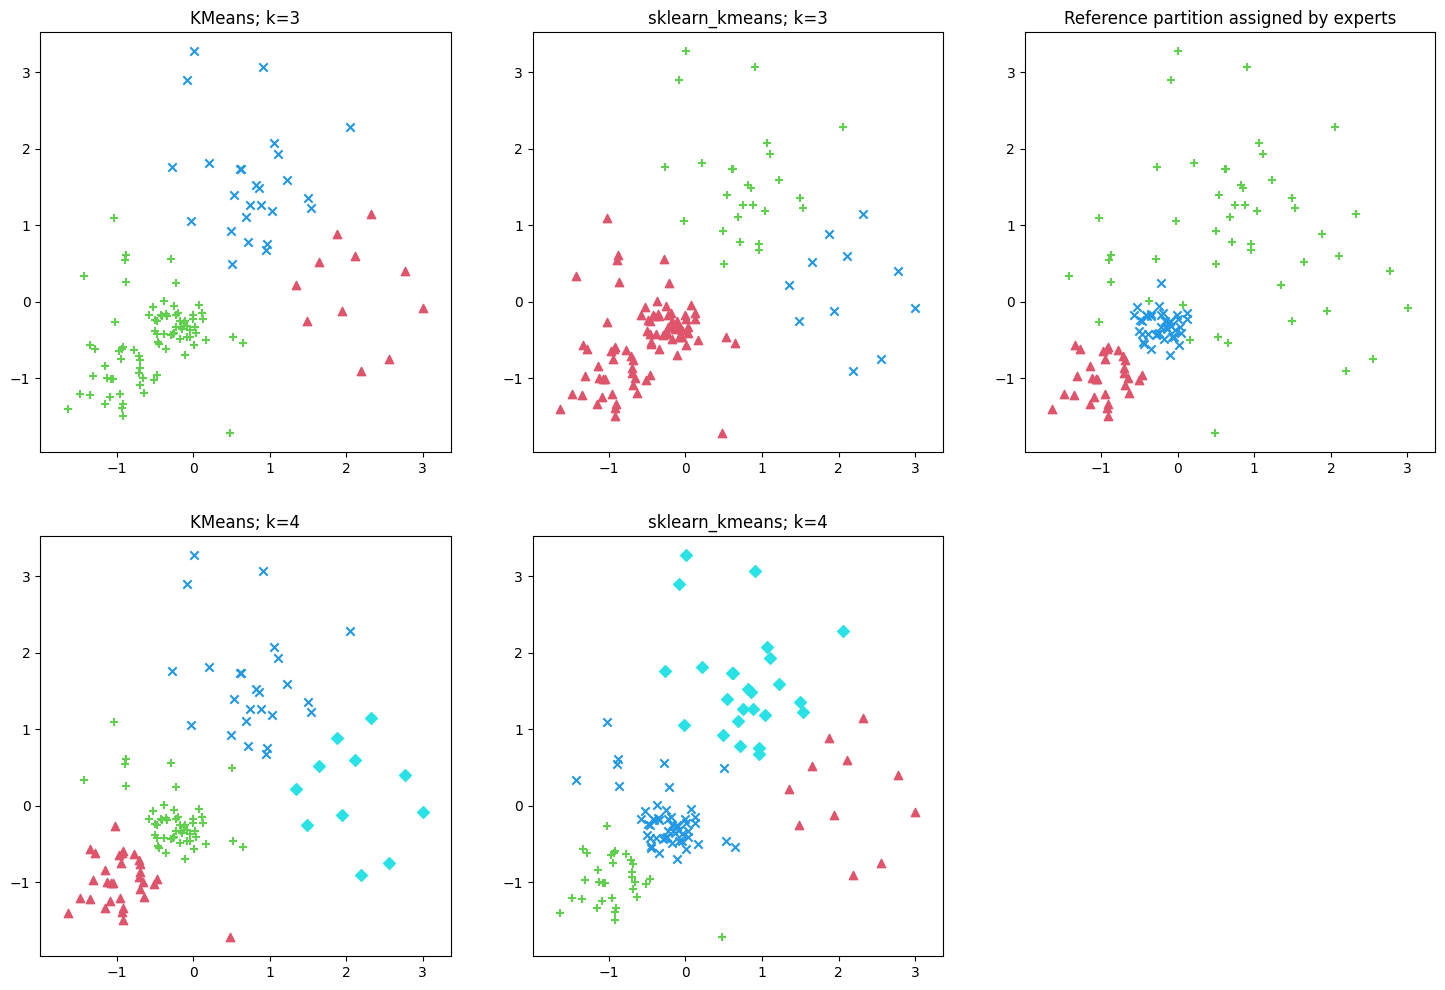

In [6]:
plot_results(["KMeans", "sklearn_kmeans"], benchmark.data, results, reference)

In [7]:
confusion_matricies_table(methods, results, reference)

╒═════════════════╤═════════════════════╕
│ KMeans k=3:     │ sklearn_kmeans k=3: │
│ [[ 0 30  0]     │ [[30  0  0]         │
│  [11 13 26]     │  [13 26 11]         │
│  [ 0 40  0]]    │  [40  0  0]]        │
├─────────────────┼─────────────────────┤
│ KMeans k=4:     │ sklearn_kmeans k=4: │
│ [[30  0  0  0]  │ [[ 0 30  0  0]      │
│  [ 2 12 25 11]  │  [11  2 12 25]      │
│  [ 0 40  0  0]] │  [ 0  0 40  0]]     │
╘═════════════════╧═════════════════════╛


In [8]:
measures(methods, results, reference)

╒═════════════════════════════╤═════════════════════════════╕
│ KMeans k=3:                 │ sklearn_kmeans k=3:         │
│ ar: 0.20905480613510818     │ ar: 0.20905480613510818     │
│ r: 0.5970588235294118       │ r: 0.5970588235294118       │
│ fm: 0.5506591463162214      │ fm: 0.5506591463162214      │
│ afm: 0.2178371027201047     │ afm: 0.2178371027201047     │
│ mi: 0.3789869171860045      │ mi: 0.3789869171860045      │
│ nmi: 0.40254477689247137    │ nmi: 0.40254477689247137    │
│ ami: 0.3910968402231978     │ ami: 0.3910968402231978     │
│ npa: 0.32500000000000007    │ npa: 0.32500000000000007    │
│ psi: 0.12172646630477958    │ psi: 0.12172646630477958    │
│ spsi: 0.0009638554216867545 │ spsi: 0.0009638554216867545 │
│ nca: 0.24096385542168675    │ nca: 0.24096385542168675    │
├─────────────────────────────┼─────────────────────────────┤
│ KMeans k=4:                 │ sklearn_kmeans k=4:         │
│ ar: 0.5708001478854264      │ ar: 0.5708001478854264      │
│ r: 0.8